In [66]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from PorousMediaLab import PorousMediaLab
import numpy as np
%matplotlib inline

In [67]:
tend = 24 ## hours
dt = 1
dx = 0.5 ## cm
L = 40 ## cm
x = np.linspace(0, L, L / dx + 1)
t = np.linspace(0, tend, round(tend / dt) + 1)
phi = ( 0.98 - 0.7 ) * np.exp( -x / 20 ) + 0.7

In [68]:
from pHcalc.pHcalc import Acid, Neutral, System

In [84]:
# def test():
g=[7.0, 7.0]
system = System()
carbonic = Acid(pKa=[3.6, 10.32], charge=0, conc=[0.01, 0.01])
system = System(carbonic)
system.pHsolve(guess=g, tol=1e-1)
g = system.pH 
    #     print(system.pH) # Should print 2.8343772

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

In [82]:
[7,7]

[7, 7]

In [71]:
ftc = PorousMediaLab(L, dx, tend, dt, phi)

In [72]:
C_init=0.01
ftc.add_species(is_solute=True, element='H2CO3', D=1e-5*60*60, init_C=C_init, bc_top=0., bc_top_type='dirichlet', bc_bot=0, bc_bot_type='flux')
ftc.add_species(is_solute=True, element='HCO3', D=1e-5*60*60, init_C=C_init, bc_top=0., bc_top_type='dirichlet', bc_bot=0, bc_bot_type='flux')
ftc.add_species(is_solute=True, element='CO3', D=1e-5*60*60, init_C=C_init, bc_top=0., bc_top_type='dirichlet', bc_bot=0, bc_bot_type='flux')
ftc.add_acid_base_equilibrium(species=['H2CO3', 'HCO3', 'CO3'], pKa=[3.6, 10.32])

In [73]:
for i in range(1, len(ftc.time)):
    ftc.integrate_one_timestep(i)

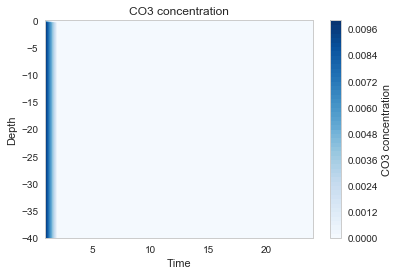

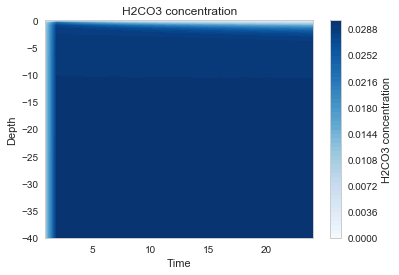

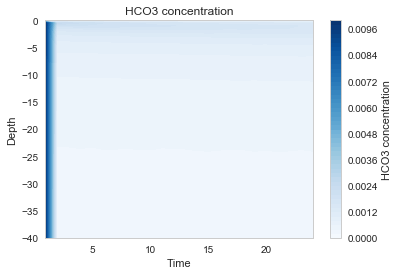

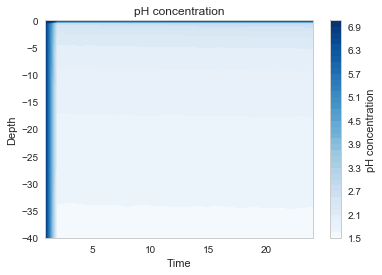

In [74]:
ftc.plot_contourplots(labels=False)

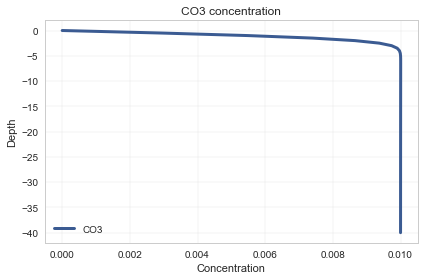

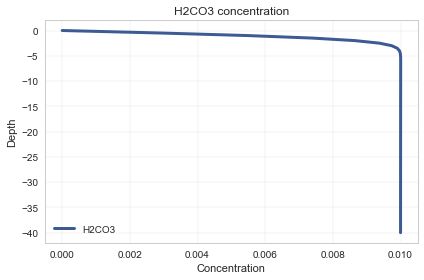

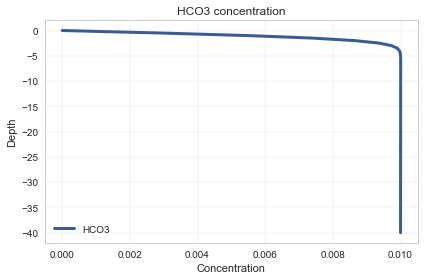

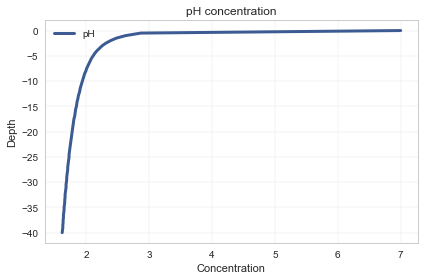

In [75]:
ftc.plot_profiles()